## [ch5. SVM (서포트 벡터 머신)](https://hoony-gunputer.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-5%EA%B0%95-SVM)
   - 머신러닝에서 가장 인기있는 모델  
   - **다목적 머신러닝 모델** (회귀, 분류, 이상치 탐색 등,,)  
   - **복잡한 분류 문제** / **작거나, 중간 사이즈의 데이터 셋**에 적합한 모델

### 5.1 선형 SVM 분류  
   - 선형분류기가 갖는 단점(결졍경계가 샘플에 너무 가까워서, **새로운 샘플에 대해 분류 정확도가 떨어지는 문제**)을 보완 할 수 있음.  
   ![선형SVM](https://miro.medium.com/max/875/1*uG0odDCi-r45Nl1Pkz5rRA.png)

- **두개의 클래스를 나누고 있고 + 제일 가까운 훈련 샘플로부터 가능한 한 멀리떨어져 있음**(<- 단점 보완 가능  
- 도로 밖에 샘플 추가 시 결정경계 영향 x , **서포트 벡터에 의해 도로의 폭이 결정**됨
### ★ 선형 SVM 분류 = 라지 마진 분류 = 가장 폭이 넓은 도로를 찾는 것 ★ ### 
---


-  ※주의) SVM은 **특성(feature)의 스케일에 민감**함. (feature값의 스케일이 잘 되어 있지 않으면, 결정경계가 제대로 만들어 지지 않음)  
     --> **사이킷 런의 StandardScaler를 사용**하면 결정경계가 좋아짐  
     ![스케일에 민감한 SVM](https://unsolvedproblem.github.io/assets/images/Hands-on/Ch5fig2.png)  
     - 왼쪽) 수직 축의 스케일 값(20단위)이 크고, 수평 축은 스케일 값(1단위)이 작아서, 균형을 이루지 못해서 결정경계가 제대로 만들어 지지 않음  
     - 오른쪽 ) 수직, 수평 축의 스케일값(1단위, 0.5단위)이 적절히 균형을 이루므로, 결정경계가 제대로 만들어 짐 ㅇㅇ

---

### 5.1.1 소프트 마진 분류 ###  
cf) **마진, 음양의 경계선, 서포트 벡터** 의미 참고  
![참고](https://lh3.googleusercontent.com/proxy/4_xAu6zRmo05HHKaUKkvEyE3sDl8xSsKwL1b1082O7QRXU-Je6Y3bwPonopIyx53q0FgNbOsTp3h_l3IthhOyBfOt3nBqtAIzlt_L31FvcMIwlTUK90JKZC6gtfjKFU1ACliG8S_M1CWa8N3Q6j2NY2xaQmlcsVk9NN4vmsSZ1AcG5YTvDhqdva4Fig1_WCj6IIJMIvORP0AA7rKhI-bvNg3bBCu1c6fohJLgq7bUMS8NmzXizAoKDyHg20NmnskHYlCg8xoiA0JvyuLDEE0Un98VoChKDF9G9igFvj4pjt0DJAZ-SgUFq9YZiUcZxujhmNs2dk)

- 하드 마진 분류: 모든 샘플이 도로 바깥쪽에 올바르게 분류된 것     
- 마진 오류: 샘플이 도로 중간이나, 심지어 반대쪽에 있는 경우 (샘플에 이상치가 있는 경우)  
- **소프트 마진 분류** : 하드 마진 분류의 단점을 보완하는. 즉, **도로 폭을 최대한 넓게 유지** 하는것과, **마진 오류 사이에 적절한 균형**을 잡은 분류   
(이상치 존재 <ㅡ> 도로의 폭 : 이상치 존재 시, 도로 폭은 좁아질 수 밖에 없음, but 이 둘의 균형을 잘 이루는 것에 초점!必!!)

이상치로 인한 오버피팅 발생 시 사용하는 하이퍼 파라미터: C
- C값이 작으면: 일반화 ↑ + 도로폭 ↑ ▶  일반화는 좋으나, 성능은 조금 떨어짐
- C값이 크면, 일반화 ↓ + 도로폭 ↓ ▶ 성능은 좋으나, 일반화에 민감해짐    
  
Ex) SVM모델이 오버피팅(훈련 데이터셋에 너무 완벽히 훈련되어짐, 이상치에 매우 민감)이 되었다면, C값을 줄이는 방향으로 설정 해줌

---

### 5.2 비선형 SVM분류  
- 비선형 데이터 셋을 다루는 SVM분류 방법  
![비선형 SVM분류](https://miro.medium.com/max/875/0*qKa9CSgwOinG31uI)  
- 왼쪽그림에서 선형으로 분류 X → **feature X2를 추가해 주었더니** → 선형으로 분류 가능

### 5.2.1  다항식 커널

- 다항식 특성 추가의 장단점  
    1. **낮은 차수**의 다항식 : 매우 복잡한 데이터셋 표현이 어려움  
    2. **높은 차수**의 다항식: 굉장히 많은 특성을 추가하므로 모델을 느리게 만듦    
    참고) [다항회귀 관련 설명](https://analysis-flood.tistory.com/86)  
        
        
- **커널트릭**: 실제로는 특성을 추가하지 않으면서, 다항식 특성을 많이 추가한 것 같은 결과를 얻을 수 있음.  
   따라서, 실제로 특성이 만들어 지지도 않으므로, 모델이 느려지는 것을 방지 할 수 있음!  
    ▶ SVC 파이썬 클래스에 구현되어 있음


In [13]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # 커널트릭을 구현할 수 있는 클래스

X, y = make_moons(n_samples = 100, noise = 0.15)
poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, C =5))])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

![커널트릭SVM](https://miro.medium.com/max/875/0*yRat20u6Pi5bcNzf)
** 커널 SVM 파라미터 설명**  
- d: 다항식 특성 추가시, 지정할 차수   
- coef0 (r): 지정한 차수(d) 에 얼마나 영향을 받을 것인지. 다항식 커널은 차수가 높아질수록 1미만의 값, 1초과의 값 사이의 차이가 크게 나므로, coef0값을 적절히 조절하면 고차항의 영향을 줄일 수 있음
- C: C가 크면 decision boundary는 더 굴곡지고, C가 작으면 decision boundary는 직선에 가깝습니다. (이상치 관련한 파라미터 라고 보면됨)

---
cf) [그리드 서치](https://skasha.tistory.com/82)
- 적절한 **하이퍼 파라미터 값을 찾는 일반적인 방법**  
- 관심있는 하이퍼 파라미터들을 대상으로 가능한 모든 조합을 시도해 보려는 것
- 처음에는 그리드 폭을 크게하여 빠른 탐색 → 이후 그리드를 세밀하게 탐색
---

### 5.2.2 유사도 특성 추가
- 비선형 특성을 다루는 기법 중 하나  
- 각 샘플이 **특정 랜드마크와 얼마나 닮았는지**를 측정하는 **유사도 함수 로 계산한 특성을 추가**해줌    

#### 5.2.3 가우시안 RBF
- 유사도 함수는 **가우시안 RBF**로 정의함.  
     - 커널에는 Polynomial, Sigmoid, 가우시안 RBF커널 등 다양하나, 그중 **성능이 가장 좋아** 자주 사용되는것이 **가우시안 RBF커널**이다.  
     - RBF 커널의 파라미터  
         1. **gammma**:  가우시안 함수의 **표준편차와 관련有**, 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정 함.  
         gamma ↑, 한 데이터 포인트가 영향력을 행사하는 거리 ↓  
         gamma ↓, 한 데이터 포인트가 영향력을 행사하는 거리 ↑  
         ![RBF 파라미터 중, 감마값](https://t1.daumcdn.net/cfile/tistory/992DEB3359EACB9301)  
         2. gamma와, C(cost) 사이의 관계  
             ![gamma, cost](https://t1.daumcdn.net/cfile/tistory/996CB13359EB266A0F)    
                 
                 
- 간단한 랜드마크 선택 방법은 **데이터 셋의 모든 샘플 위치에 랜드마크를 선정하는 법**   
→ 단, 차원이 매우 커지고, 훈련세트가 매우 클 경우 매우 고차원이 되므로 속도저하 등의 문제有  
    
    
- SVC클래스에서 커널트릭을 사용하여 가우시안 RBF커널 SVM을 구현할 수 있음  
    `rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf", gamma = 5, C = 0.001))])`  
  

---  
cf) 여러가지 커널 중 어떤 커널 사용?  
- 선형커널을 가장 먼저 사용하는 것이 일반적. (LinearSVC가 SVC(kernel = "linear")보다 훨씬 빠름)  
- 데이터 셋이 아주 크거나, 특성 수가 많으면 선형커널을, 훈련 데이터 셋이 너무 크지 않으면 가우시안 RBF커널을 시도 해보는 것도 굿  
---

### 5.2.4 계산복잡도  
- LinearSVC: 선형 SVM을 위한 최적화된 알고리즘을 구현한 liblinear라이브러리를 기반으로 함.   
▶ **커널트릭이 지원되진 않음**. 일반적인 선형 SVM 모델 구현시 사용. (다항특성 추가시에도, LinearSVC사용 O)  
    
    
- SVC는 **커널트릭이 지원됨**(가우시안, string 커널등,,)    
▶ **시간복잡도가 매우 커서, 복잡하지만 작거나 중간 규모의 훈련세트**에 이 알고리즘이 잘 맞음

### 5.3 SVM 회귀   
    (skip)

### 5.4 SVM 이론  
   - 5.4.1 결정함수와 예측  
       - **선형 SVM 분류기를 훈련시킨다**  
           - 회귀직선 훈련과 동일한 맥락으로 이해하면됨. 얘도 Wx + b의 함수를 갖는다고 가정하고, 아래의 조건을 만족시키는 W, b를 찾는 과정임
               1. 마진오류(이상치)를 하나도 발생시키지 않음   
               2. 마진오류가 어느정도 있으나 가능한한 도로의 폭을 넓게하는 **W와 b를 찾는 과정**이라고 보면됨.    
               
     - 고차원에서 본 선형 svm분류기
         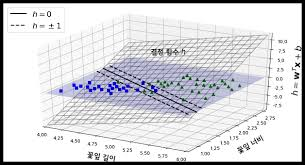
             
         - n개의 특성이 존재할 때, 결정함수는 n차원의 초평면으로 나타나게되고, 이때 결정함수는 n-1차원의 초평면으로 나타나게됨.  
         - 결정경계는 결정함수의 값이 0인 (음성인, 즉 분류되지 않는 지점) 이며, 결정함수의 값이 1이면 (양성인, 분류되는 지점) 최대 마진 경계라고 보면 됨
    

- 5.4.2 목적함수  
    - 결정함수의 기울기 =  가중치(w)의 norm과 같음.  
    - 기울기가 1/2만큼 줄면, 마진은 2배 만큼 넓어짐  
    **따라서, 가중치(w) 가 작을 수록 → 결정함수의 기울기는 줄어들고 → 마진은 넓어지게 됨**    
      
      
   - **하드마진**: 마진 오류를 하나도 만들지 않는 분류   
   따라서 하드마진 선형 SVM 분류기의 목적 함수는 **1/2(W^t*W)** 로 나타낼 수 있음    
   
     
   - **소프트 마진**: 마진 오류 허용과, 마진 폭 조절 사이의 **Trads-off를 적절히 절충한 분류**  
       - 소프트 마진 목적함수 구성엔 **슬랙변수**가 추가됨.  
       - 슬랙(i) : i번째 샘플이 얼마나 마진을 위반할지 결정  
           
        **목표: 마진 오류 최소화와 마진값(도로폭) 최대화 사이의 절충안 찾기**  
    1. 슬랙값을 작게 만들기  → 마진 오류 최소화
     2. 마진을 크게 하기위해 1/2(W^t*W)를 최소화  
     3. 두 목표 사이의 트레이드 오프 정의 하는 파라미터 C   
       
      따라서, 이 세가지 파라미터로 구성된 목적함수 **1/2(W^t*W) + C시그마(슬랙)** 로 나타내짐

- 5.4.3 콰드라틱 프로그래밍 (pass)

- ★ 5.4.4 쌍대 문제

- ★ 5.4.5 커널 SVM

- 5.4.6 온라인 SVM  
    - 온라인 학습: 새로운 샘플이 생겼을 때, 점진적으로 학습하는 것을 의미함.
    - 선형 SVM분류기 비용함수(식5-13)를 최소화 하기 위해 경사하강법을 사용함.  
        - 왼쪽항은 **제약을 주어 애초에 마진을 크게** 해버리고 , **뒤쪽항을 최소화시키는 방향**으로 하면 마진오류도 최소화하고 크기도 작게 만듦
